In [9]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

#Load_Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Date_CleanUp
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\user\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Tue Jun 10 20:06:45 2025).


In [2]:
# Data Scientist Jobs In UK

df_DS_UK = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United Kingdom')].copy()

In [12]:
df_plot = df_DS_UK['job_location'].value_counts().head(10).to_frame()

df_plot

,count
job_location,
"London, UK",3550
United Kingdom,982
Anywhere,808
"England, UK",344
"Manchester, UK",329
"Leeds, UK",177
"Bristol, UK",172
"Birmingham, UK",134
"Cambridge, UK",113


Text(0, 0.5, '')

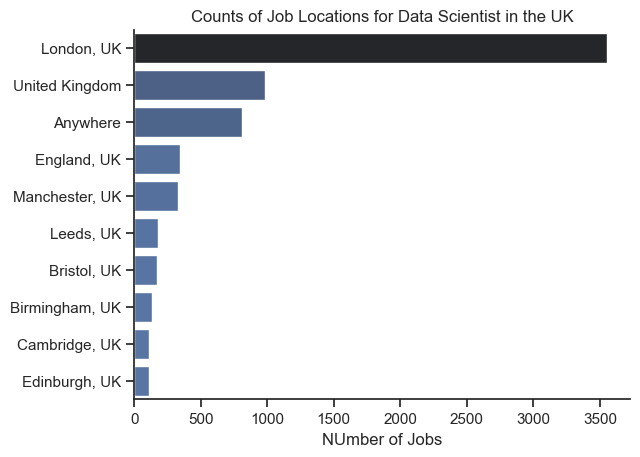

In [ ]:
sns.set_theme(style='ticks')

sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Scientist in the UK')
plt.xlabel('NUmber of Jobs')
plt.ylabel('') 

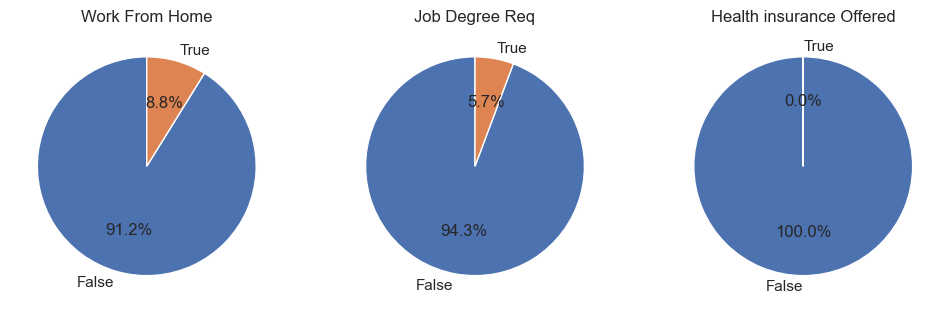

In [22]:
dict_column = {
    'job_work_from_home':   'Work From Home',
    'job_no_degree_mention':    'Job Degree Req',
    'job_health_insurance':  'Health insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12, 5))

for i,(column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DS_UK[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False','True'])
    ax[i].set_title(title)

Text(0, 0.5, '')

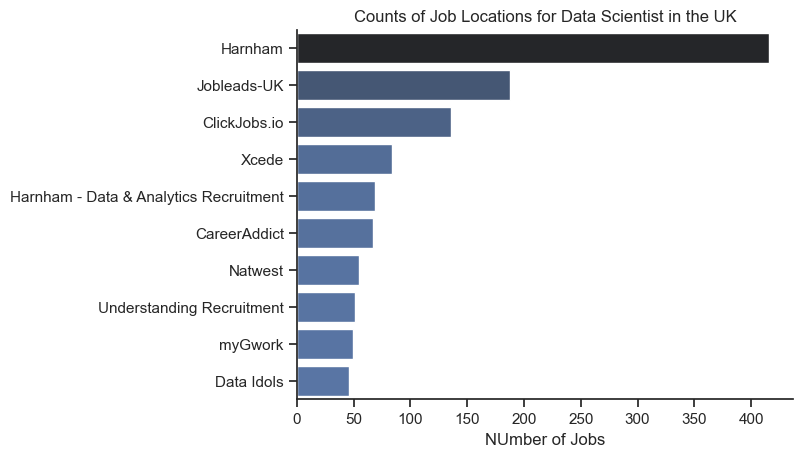

In [24]:
df_plot = df_DS_UK['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')

sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Scientist in the UK')
plt.xlabel('NUmber of Jobs')
plt.ylabel('') 